In [1]:
#importing the libraries that will be needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
#load the dataset
df = pd.read_csv("Healthcare Workforce Mental Health Dataset.csv")

#show the first few rows and the structure
print(df.head())
print(df.info())

  Employee ID          Employee Type           Department  \
0   HCP-00001        Pediatric Nurse           Pediatrics   
1   HCP-00002  Laboratory Technician           Laboratory   
2   HCP-00003      Nursing Assistant      Assisted Living   
3   HCP-00004      Medical Assistant  Outpatient Services   
4   HCP-00005       Registered Nurse     General Medicine   

        Workplace Factor  Stress Level Burnout Frequency  Job Satisfaction  \
0         Heavy Workload             8             Often                 2   
1        Safety Concerns             8             Often                 1   
2  Poor Work Environment             6      Occasionally                 2   
3  Poor Work Environment             7             Never                 4   
4    Work-Life Imbalance             8      Occasionally                 2   

  Access to EAPs  Mental Health Absences Turnover Intention  
0            Yes                       6                 No  
1            Yes                      12

In [4]:
#converting the categorical (text-based) columns into numbers.
categorical_cols = ['Employee Type', 'Department', 'Workplace Factor',
                    'Burnout Frequency', 'Access to EAPs', 'Turnover Intention']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [6]:
# Separating the dataset into "features" (X) that we will use to predict,
# and the "target" (y) which is the column we want to predict: turnover intention.

X = df.drop(columns=['Employee ID', 'Turnover Intention'])  
y = df['Turnover Intention']

In [7]:
#splitting the dataset into training data (70%) and testing data (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
#Training the decision tree model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

Confusion Matrix:
 [[269 231]
 [130 870]]


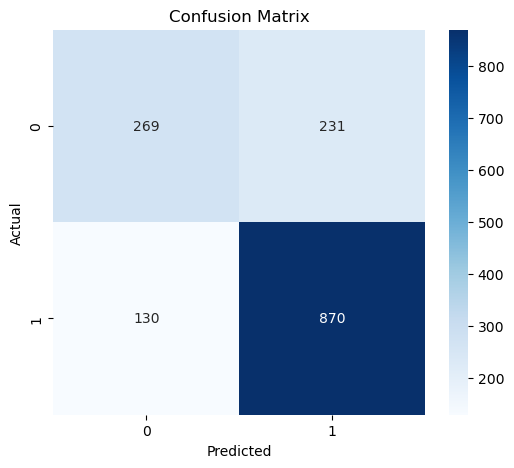

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

In [9]:
#Evaluating the model performance

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7593333333333333

Confusion Matrix:
 [[269 231]
 [130 870]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.54      0.60       500
           1       0.79      0.87      0.83      1000

    accuracy                           0.76      1500
   macro avg       0.73      0.70      0.71      1500
weighted avg       0.75      0.76      0.75      1500



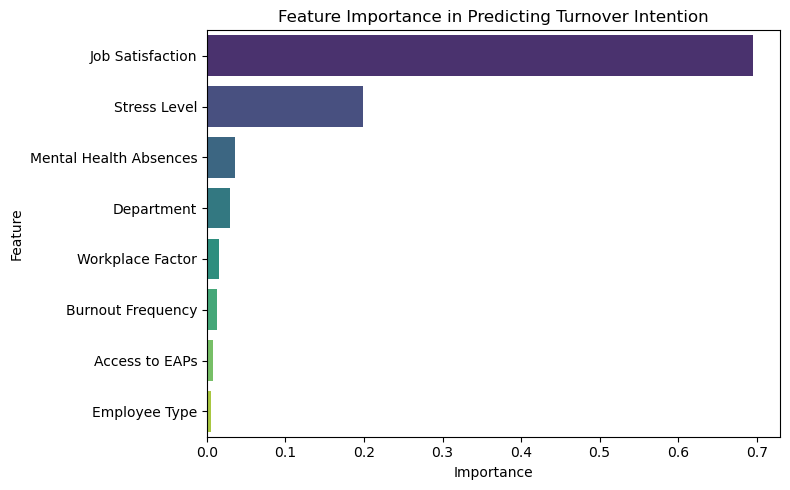

In [12]:
#Visualising Feature Importance

plt.figure(figsize=(8,5))
sns.barplot(
    data=importances,
    x='Importance',
    y='Feature',
    hue='Feature',          # Use Feature column for coloring
    dodge=False,            # Keep bars aligned
    legend=False,           # Hide the legend (not needed)
    palette='viridis'
)
plt.title("Feature Importance in Predicting Turnover Intention")
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300)   # Save the figure
plt.show()

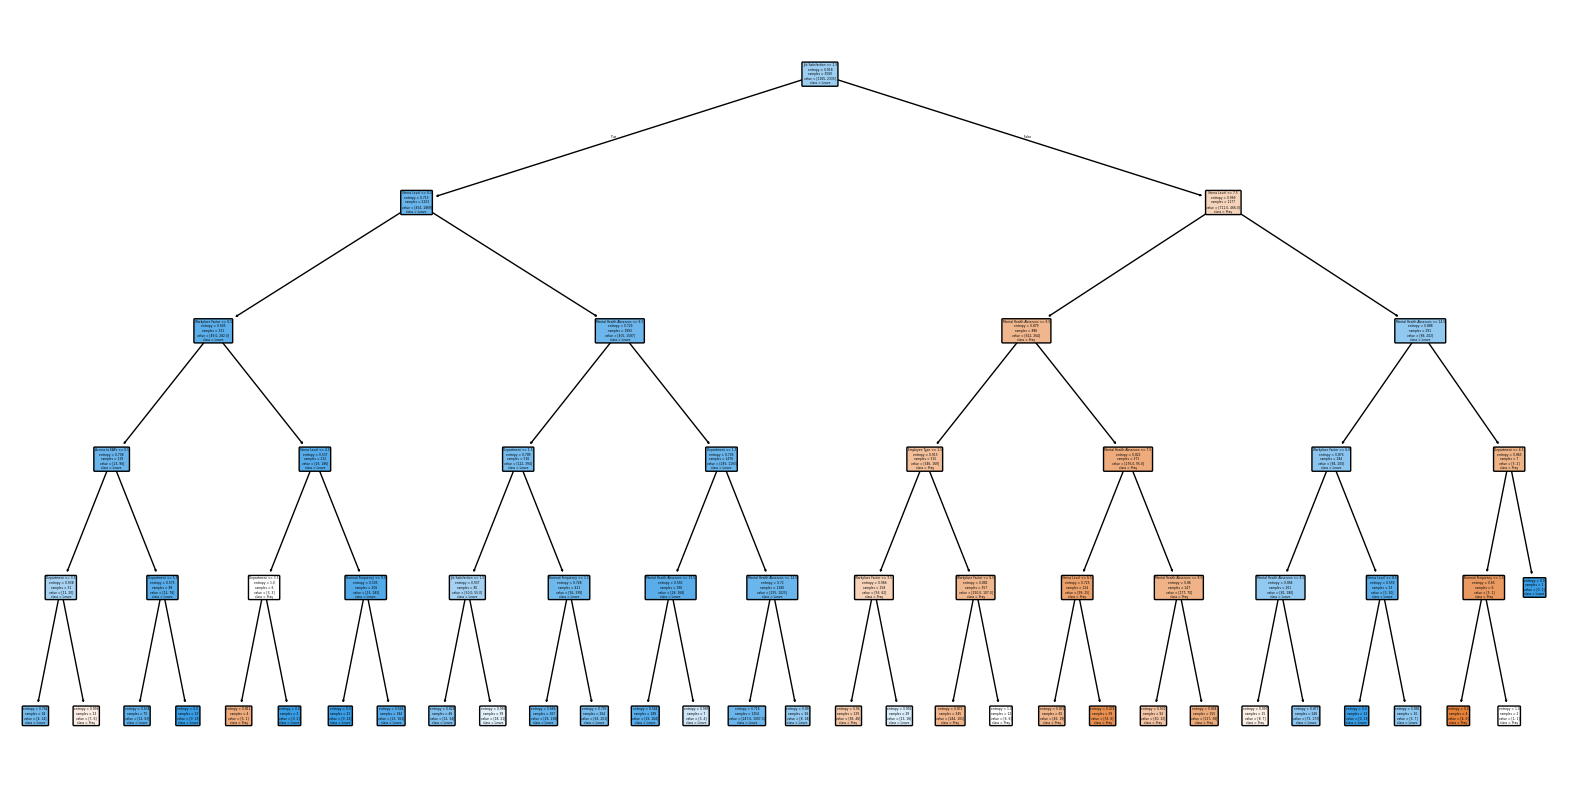

In [13]:
#Decision Tree Visualisation
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Stay','Leave'], filled=True, rounded=True)
plt.savefig("decision_tree.png", dpi=300)
plt.show()


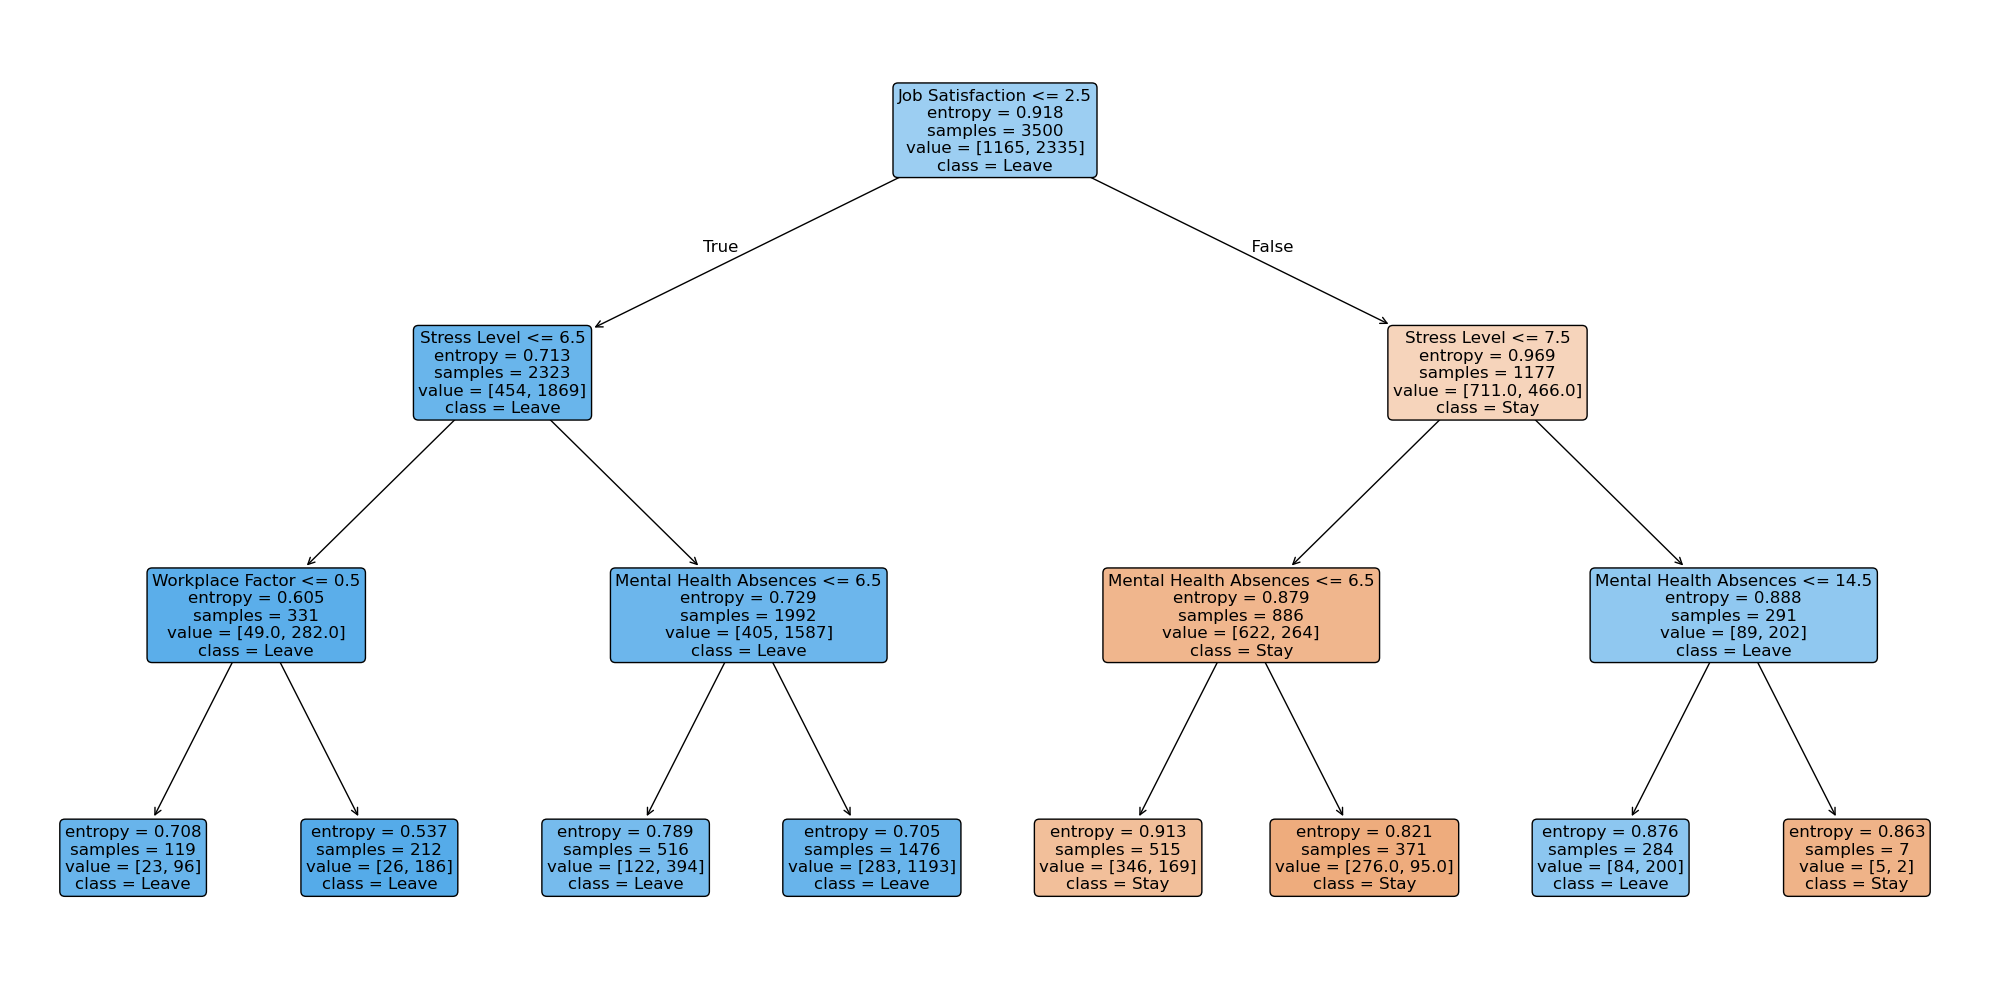

In [14]:
# Train a smaller tree for visualisation
viz_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
viz_clf.fit(X_train, y_train)

# Plot this smaller tree
plt.figure(figsize=(20,10))
plot_tree(
    viz_clf,
    feature_names=X.columns,
    class_names=['Stay','Leave'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.tight_layout()
plt.savefig("decision_tree_simplified.png", dpi=300)
plt.show()